In [47]:
#Imports

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [85]:
df = web.DataReader('WEGE3.SA', data_source='yahoo', start='2012-01-01', end='2021-03-10')

In [86]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,5.633136,5.520710,5.633136,5.520710,183534.0,4.574147
2012-01-03,5.943786,5.550295,5.550295,5.650887,3134950.0,4.682005
2012-01-04,5.710059,5.650887,5.650887,5.680473,569530.0,4.706518
2012-01-05,5.763313,5.621301,5.621301,5.715976,378898.0,4.735933
2012-01-06,5.798816,5.565088,5.786982,5.650887,1718730.0,4.682005


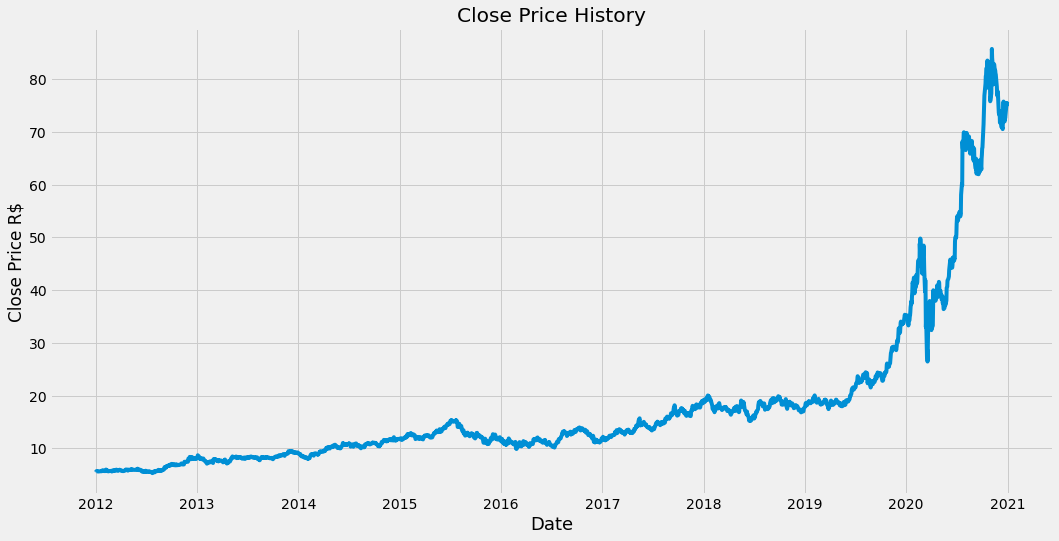

In [88]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price R$')
plt.show()

In [90]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1819

In [91]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00234934],
       [0.00384746],
       [0.00418795],
       ...,
       [0.73461748],
       [0.76166209],
       [0.76223754]])

In [92]:
#Criar o training_dataset
train_data = scaled_data[0:training_data_len, :]
#Criar o scaled trainig dataset

#Split x_train e y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)

[array([0.00234934, 0.00384746, 0.00418795, 0.00459653, 0.00384746,
       0.00384746, 0.00350698, 0.00350698, 0.00350698, 0.00384746,
       0.00384746, 0.00384746, 0.00367722, 0.00405176, 0.00398365,
       0.0040858 , 0.00520939, 0.0062649 , 0.00554988, 0.00442628,
       0.0051413 , 0.00507321, 0.00439223, 0.00418795, 0.00640109,
       0.00776303, 0.00697991, 0.00558393, 0.00435819, 0.00572012,
       0.00388151, 0.00384746, 0.00384746, 0.00435819, 0.00452844,
       0.00476677, 0.00405176, 0.00343888, 0.00384746, 0.00411985,
       0.00599251, 0.00565203, 0.00442628, 0.00558393, 0.00589037,
       0.00493702, 0.00537963, 0.00589037, 0.00704802, 0.00759279,
       0.0061287 , 0.00691181, 0.00565203, 0.00677562, 0.00677562,
       0.00544773, 0.00691181, 0.00742254, 0.00708206, 0.0062649 ])]
[0.00623085054320166]


In [94]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [96]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1759, 60, 1)

In [99]:
#build LSTM model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')



In [101]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1759/1759 [==============================] - 30s 17ms/step - loss: 9.2542e-05


In [102]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data )):
    x_test.append(test_data[i-60:i,0])

In [103]:
x_test = np.array(x_test)

In [104]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [106]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [107]:
rsme = np.sqrt(np.mean(predictions - y_test)**2)

rsme

3.8864926955773442

<ipython-input-109-01ec5e91da55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


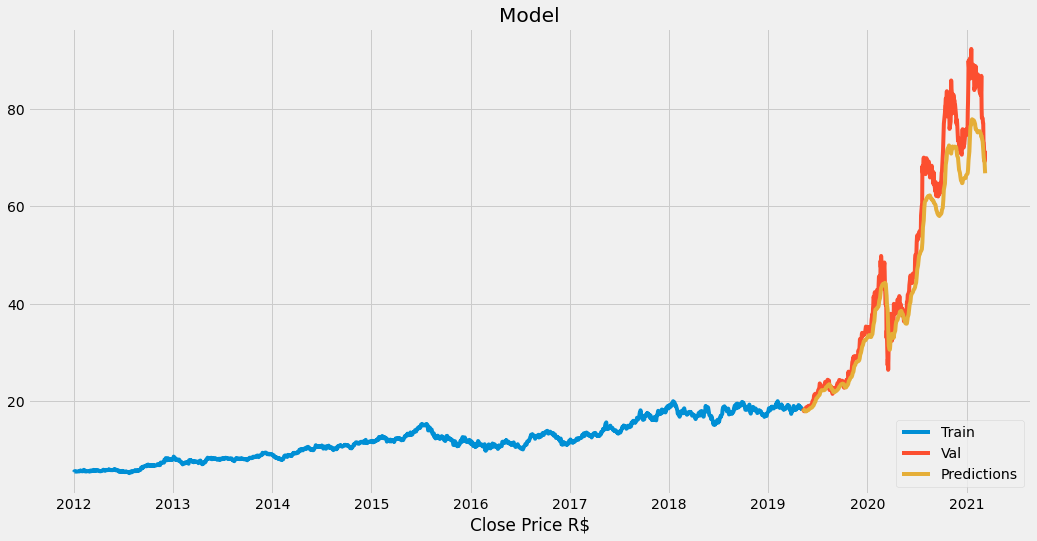

In [109]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.xlabel('Close Price R$')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()